## IB API demo
last modified: 12-28-2018

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

import sys, os
sys.path.append(os.path.join(os.path.dirname('.'), '..', 'lib'))
from interactivebrokers import ib_api

In [2]:
# After execution, TWS will prompt you to accept the connection
# The ERROR simply confirms that there is a connection to the market data.
app = ib_api.main(port=7496)

serverVersion:142 connectionTime:b'20190113 16:12:20 EST'


ERROR:root:ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR:root:ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR:root:ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR:root:ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR:root:ERROR -1 2106 HMDS data farm connection is OK:njhmds


### Get Data

**quotes**

In [3]:
app.get_quotes(["AAPL", "NVDA", "JPM"])

AAPL    152.35
NVDA    148.62
JPM      99.81
dtype: float64

**price history**

In [4]:
end_date = datetime.today()
start_date = end_date - timedelta(days=300)
symbols = ["AAPL", "NVDA", "JPM"]
bars = app.get_price_history(symbols=symbols, rth=False, start_date=start_date, end_date=end_date)
bars.head(10)

symbol          AAPL                                              JPM          \
price    close_price    high     low open_price    volume close_price    high   
20171101      166.72  170.19  165.61     169.50  302685.0      100.76  101.70   
20171102      173.38  174.35  165.28     166.80  373832.0      101.67  101.77   
20171103      172.40  175.95  171.12     173.55  540067.0      101.40  101.75   
20171106      174.20  174.99  171.72     173.00  310622.0      101.00  101.69   
20171107      174.40  175.25  173.60     174.20  216438.0       98.69  101.00   
20171108      176.75  177.10  174.20     174.40  205710.0       97.65   98.73   
20171109      176.00  176.69  173.14     176.30  252020.0       97.68   98.22   
20171110      174.56  175.48  174.27     175.42  196949.0       97.58   98.34   
20171113      173.82  175.00  173.40     174.70  148132.0       97.82   98.05   
20171114      171.50  174.18  170.50     174.18  213611.0       97.09   97.78   

symbol                                       NVDA                             \
price        low open_price    volume close_price    high     low open_price   
20171101  100.45     101.14   75295.0      206.20  209.98  204.60     208.02   
20171102  100.16     101.44   79795.0      206.91  207.81  203.65     206.20   
20171103  100.73     101.57   64173.0      208.50  208.90  205.34     207.50   
20171106  100.63     100.63   74171.0      209.95  209.98  203.60     208.70   
20171107   98.25     100.40  139676.0      211.57  212.90  209.51     210.49   
20171108   97.15      98.57  130709.0      208.65  212.45  207.24     212.03   
20171109   96.68      97.20  126119.0      211.90  211.90  200.37     208.70   
20171110   97.50      97.69   85604.0      216.50  218.67  211.00     211.00   
20171113   96.62      97.00   86379.0      213.19  217.85  212.01     217.50   
20171114   96.85      97.51   93211.0      213.71  214.80  211.23     213.50   

symbol              
price       volume  
20171101  110848.0  
20171102   73014.0  
20171103   77014.0  
20171106   85447.0  
20171107   92030.0  
20171108  114811.0  
20171109  210118.0  
20171110  279888.0  
20171113  126583.0  
20171114  113632.0

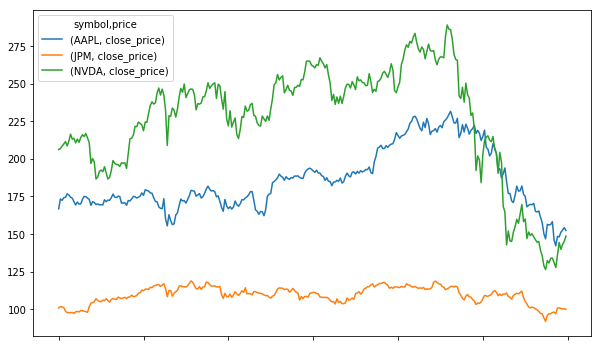

In [5]:
ax = bars.loc[:, (slice(None), 'close_price')].plot(figsize=(10,6))

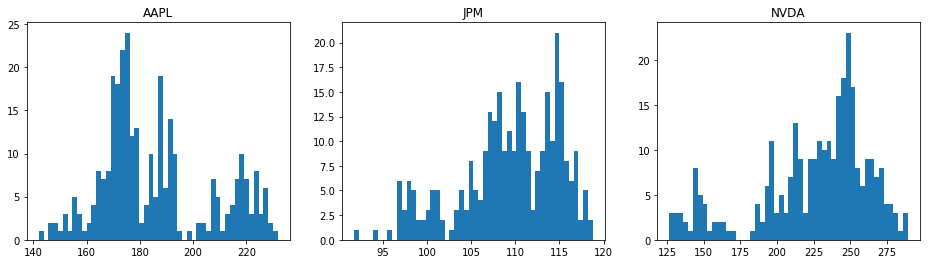

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for i, sym in enumerate(bars.columns.get_level_values(0).unique()):
    ax[i].hist(bars.loc[:, (sym, 'close_price')], bins=50)
    ax[i].set_title(sym)

#### Get Contracts

In [7]:
app.get_contract_details("AAPL")

{'currency': 'USD',
 'exchange': 'SMART',
 'primaryExchange': 'ISLAND',
 'secId': '',
 'secIdType': '',
 'secType': 'STK'}

#### Make a saved order

In [8]:
bracket_order = {
    'symbol': "AAPL",
    'instruction': "BUY",
    'price': 150.,
    'quantity': 100,
    'outside_rth': False,
    'tif': "DAY",
    'profit_price': 160,
    'stop_price': 145
}
app.create_bracket_orders(bracket_order)

#### Place order

In [9]:
app.place_all_orders()

ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.usfarm.nj
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.usfarm.nj
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.cashfarm
ERROR:root:ERROR -1 2108 Market data farm connection is inactive but should be available upon demand.cashfarm
